# Cardiovascular Diseases Prediction

## Main objetive 

Build a Random Forest model to predict whether a person can suffer or not some cardiovascular disease gives several features such as age, weight, Systolic blood pressure, Cholesterol, etc.

Author: Luis Fernando Salazar 
Date: 1/07/2021

In [1]:
## import libraries 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from colorsetup import  colors, palette
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
plt.style.use('ggplot')

## Load the Cardiovascular diseases dataset 

Data source: https://bit.ly/3yjVsJG

In [2]:
## load the data 
datafile = '.../cardiovascular diseases.csv'
Cardio = pd.read_csv(datafile)

## Exploratory data analysis and data cleaning

a) Exploratory data analysis 

b) Data cleaning 

### a) Exploratory data analysis 

- Overview information of data
- Data dimesionality 
- Statistics summary
- pairplot
- Histograms 
- Heatmap 

In [3]:
Cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age_years    70000 non-null  int64  
 2   age_days     70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [4]:
Cardio.head()

,id,age_years,age_days,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
### Dimesionality of the data 
print('data dimension',Cardio.shape)

data dimension (70000, 14)


In [6]:
cardio = Cardio.copy()

In [7]:
cardio.drop(['id', 'age_days'], axis=1, inplace=True)

In [8]:
## statistics summary 
cardio.describe().T

,count,mean,std,min,25%,50%,75%,max
age_years,70000.0,53.343829,6.765250,30.0,48.0,54.0,58.0,65.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


Text(0.65, 1.25, 'Cardio diseases (target variable- 1:presence and 0:adsence)')

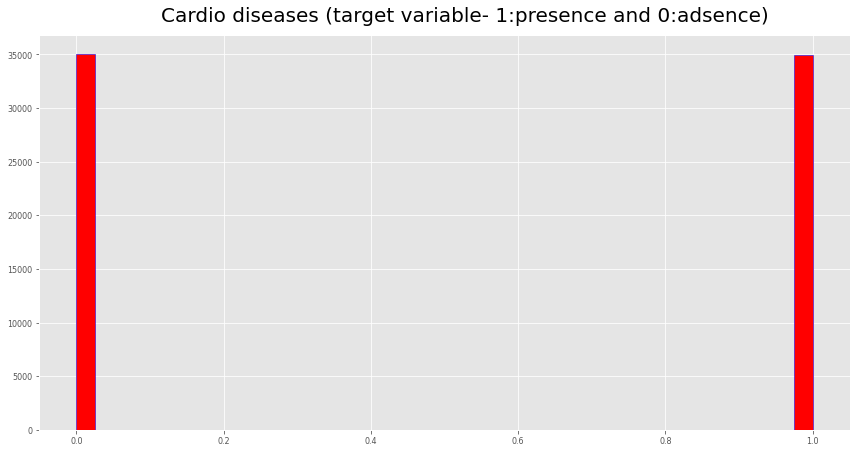

In [9]:
## Data distribution (histogram)
cardio['cardio'].hist(bins= 40,edgecolor='b', xlabelsize=8, ylabelsize=8, color='red', grid=True, figsize=(10,5))    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.suptitle('Cardio diseases (target variable- 1:presence and 0:adsence)',
             x=0.65, y=1.25, fontsize=20)

Text(0.65, 1.25, 'Features')

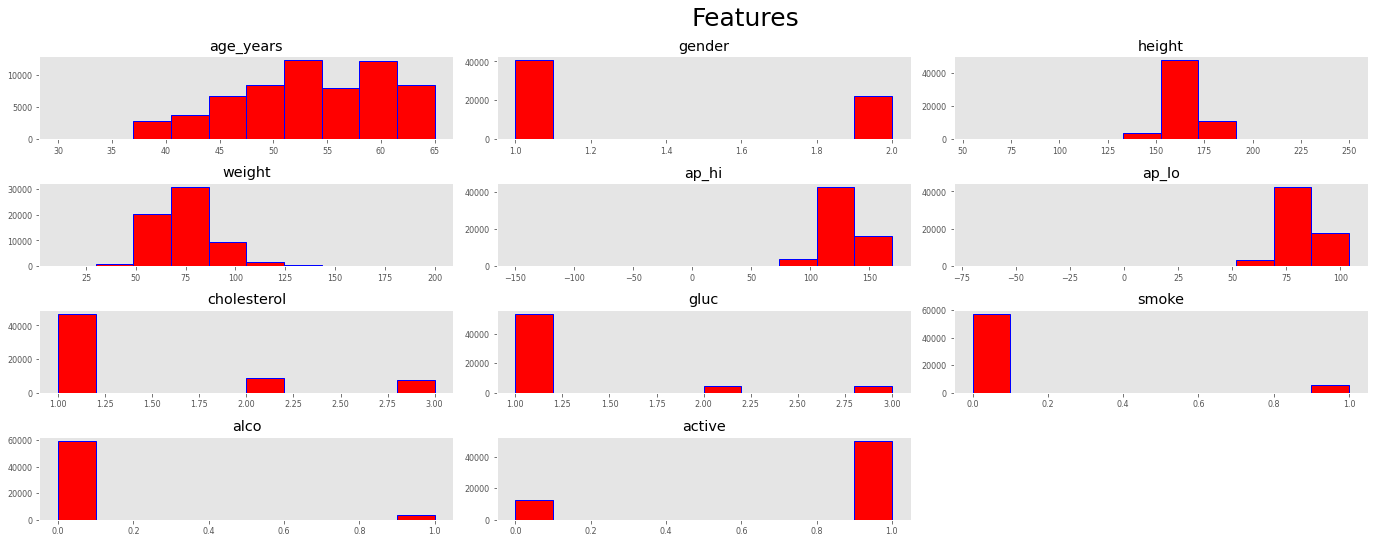

In [58]:
cardio_features = cardio[['age_years','gender','height','weight','ap_hi','ap_lo','cholesterol',
                         'gluc','smoke','alco','active']]
cardio_features.hist(edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Features', x=0.65, y=1.25, fontsize=25)

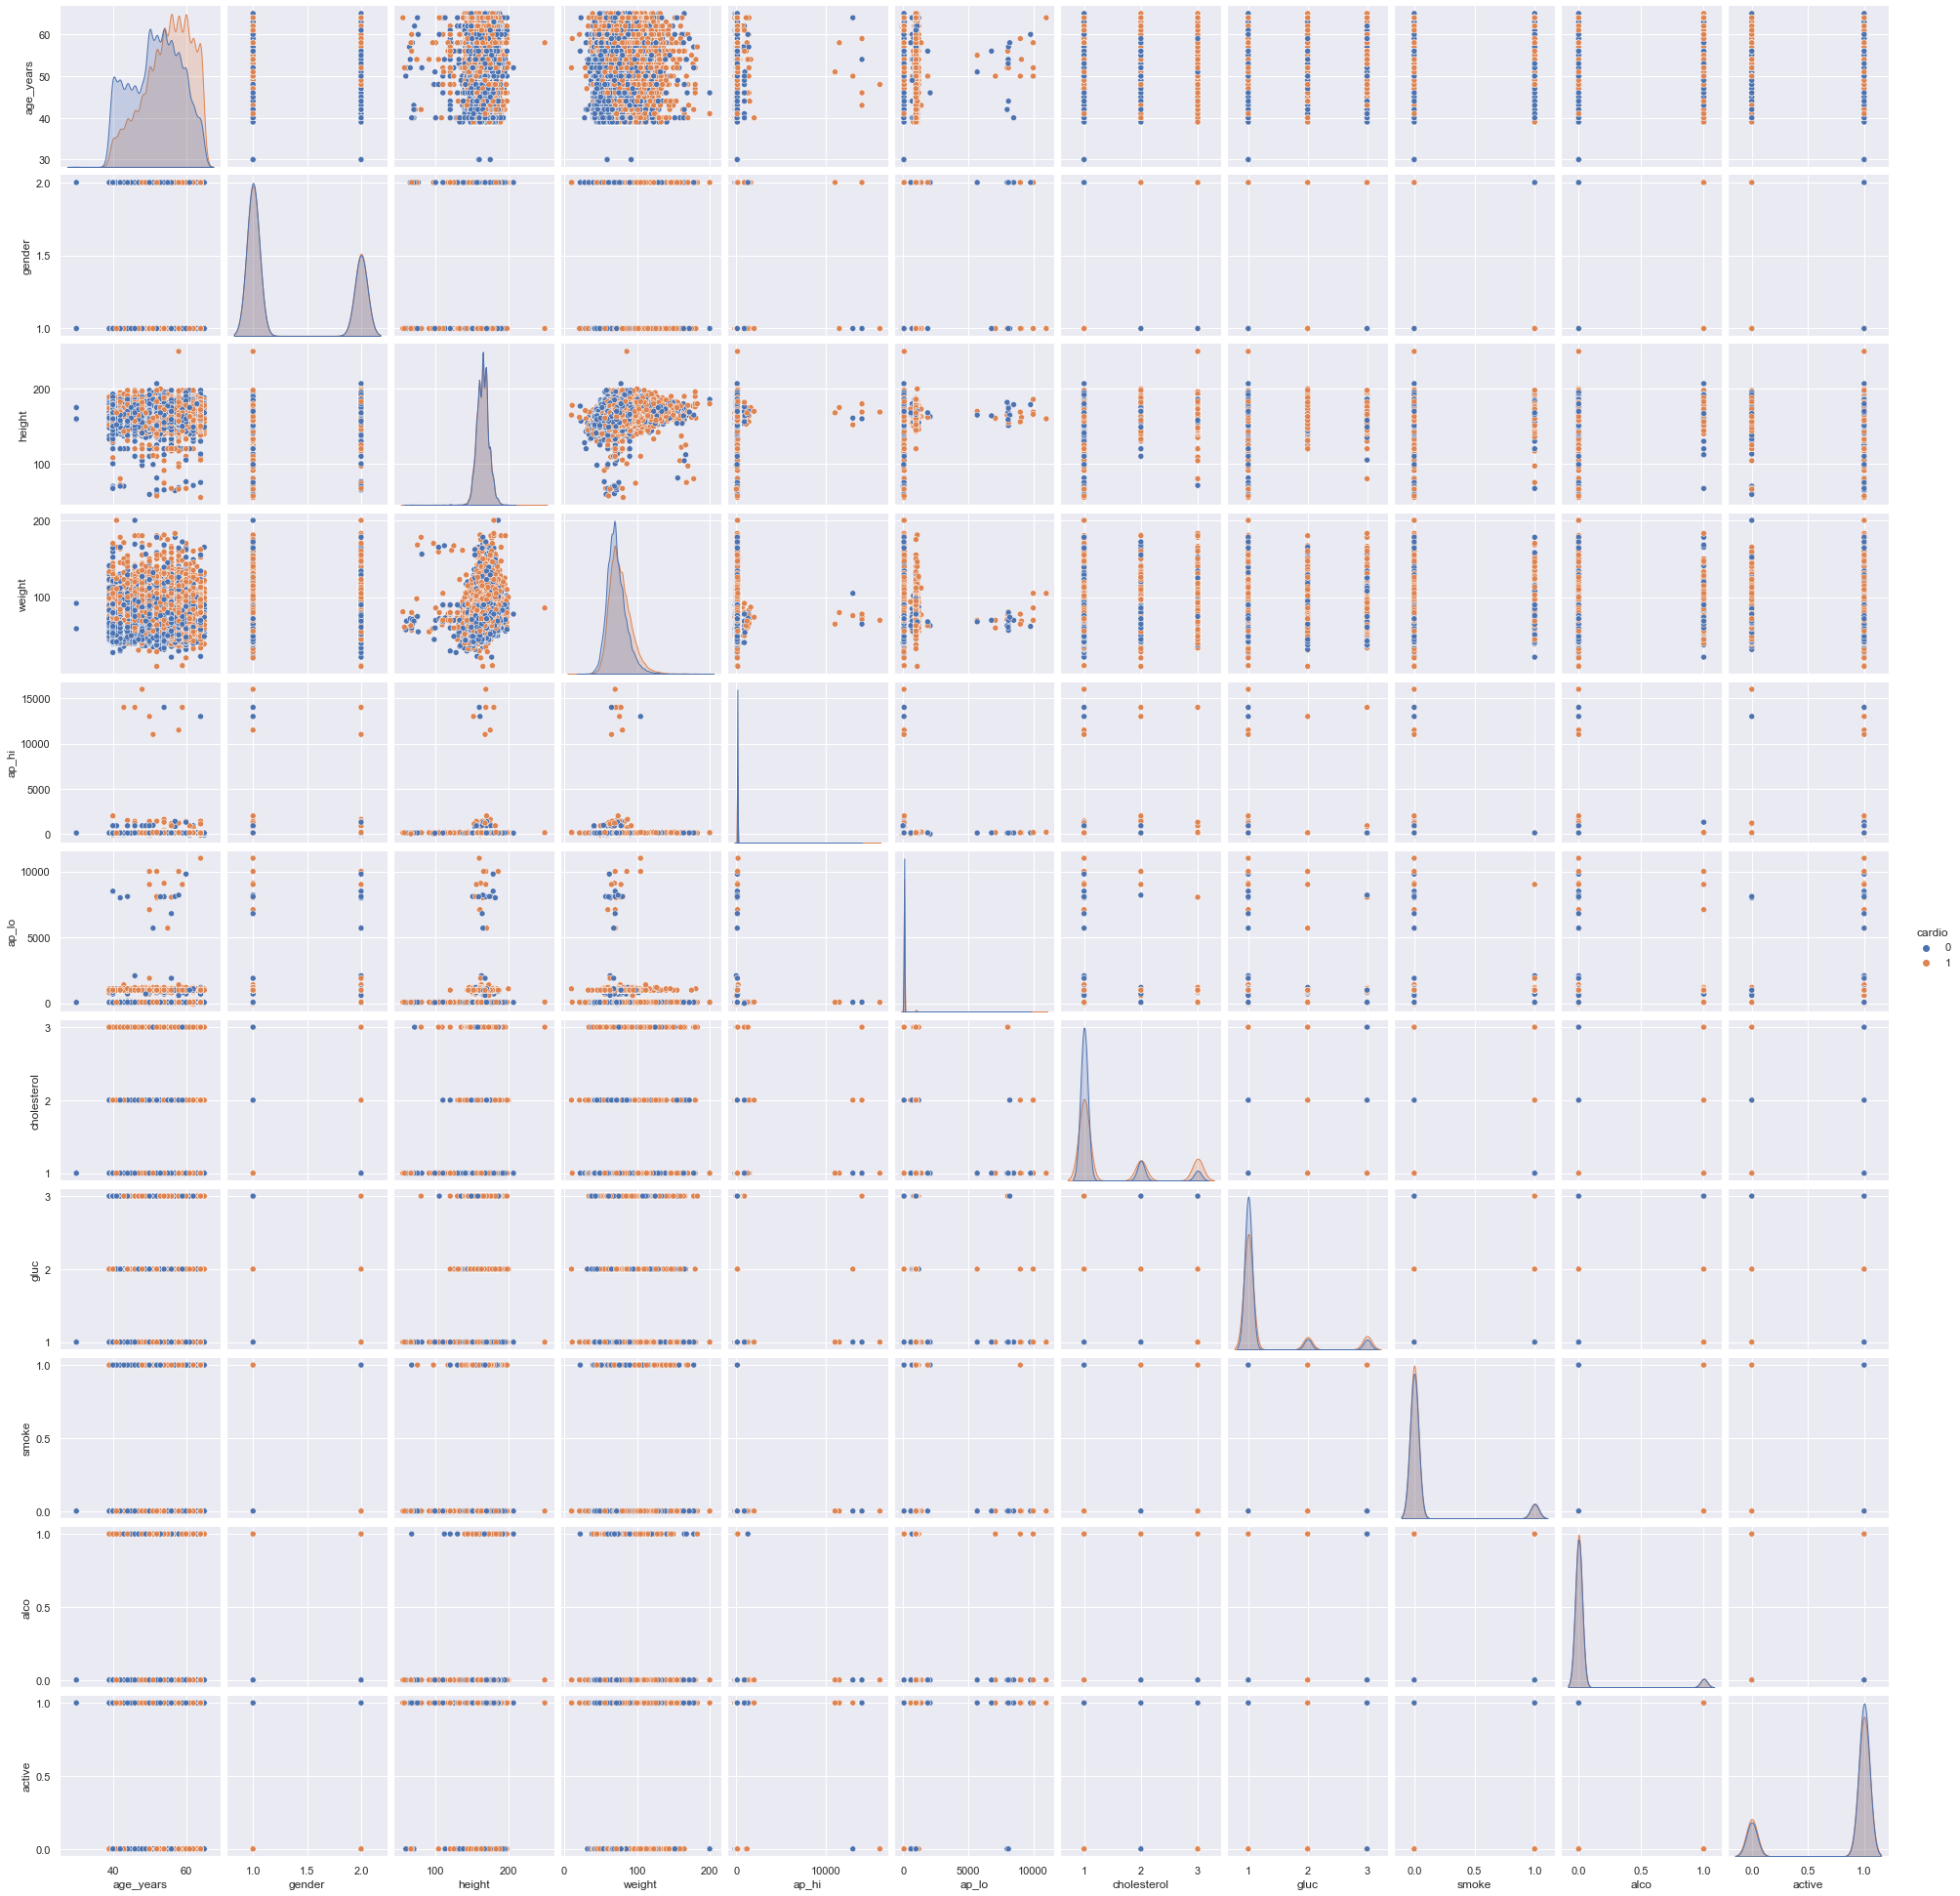

In [12]:
## pairplot
sns.set(rc={'figure.figsize':(18,11)})
sns.pairplot(cardio, hue='cardio')
sns.set_context('talk')
sns.set_palette(palette)
sns.set_style('white')

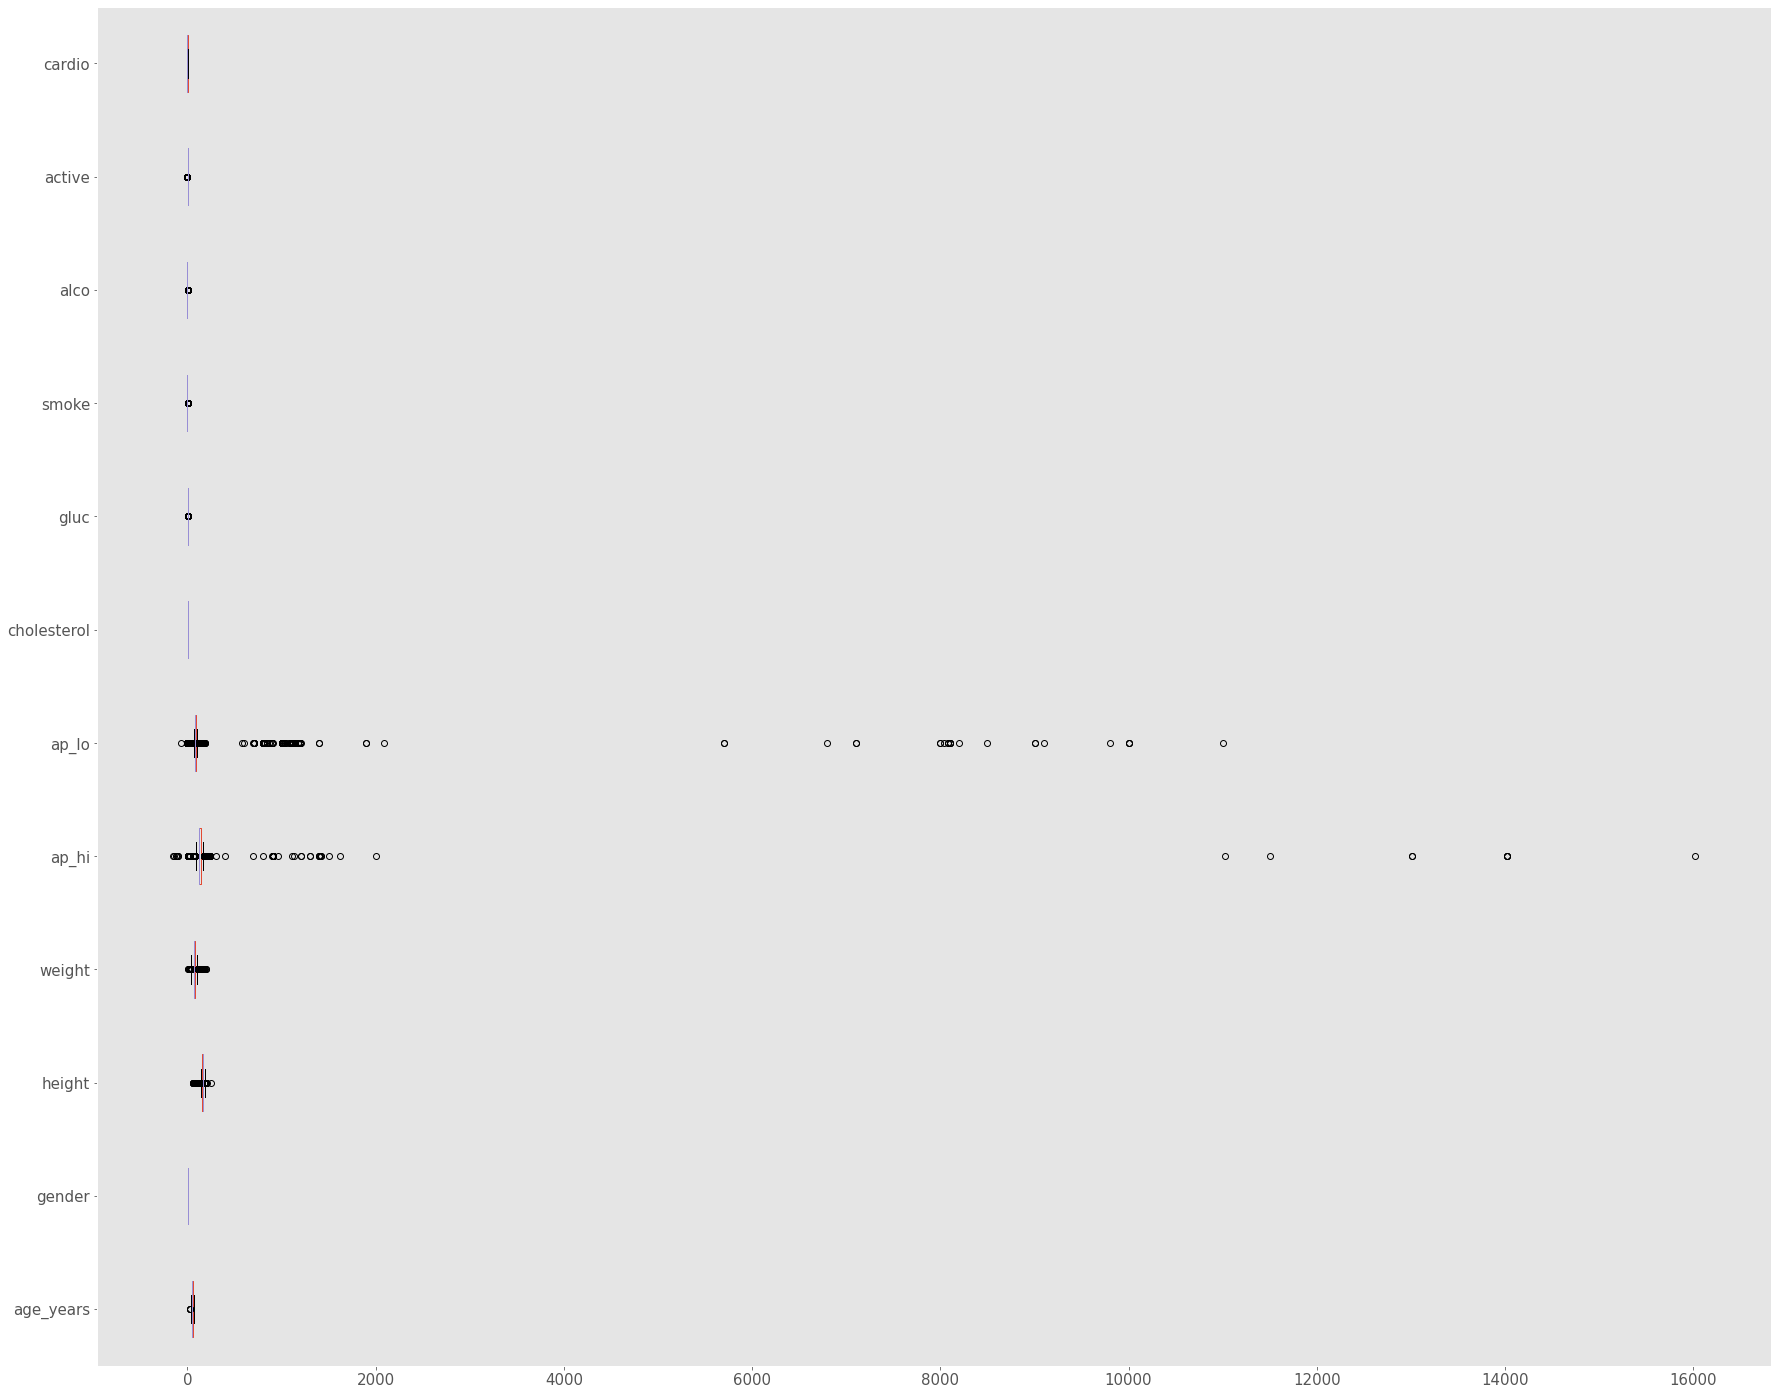

In [11]:
## Boxplot
cardio.boxplot(grid=False, vert=False,fontsize=15, figsize=(30,25))
plt.show()

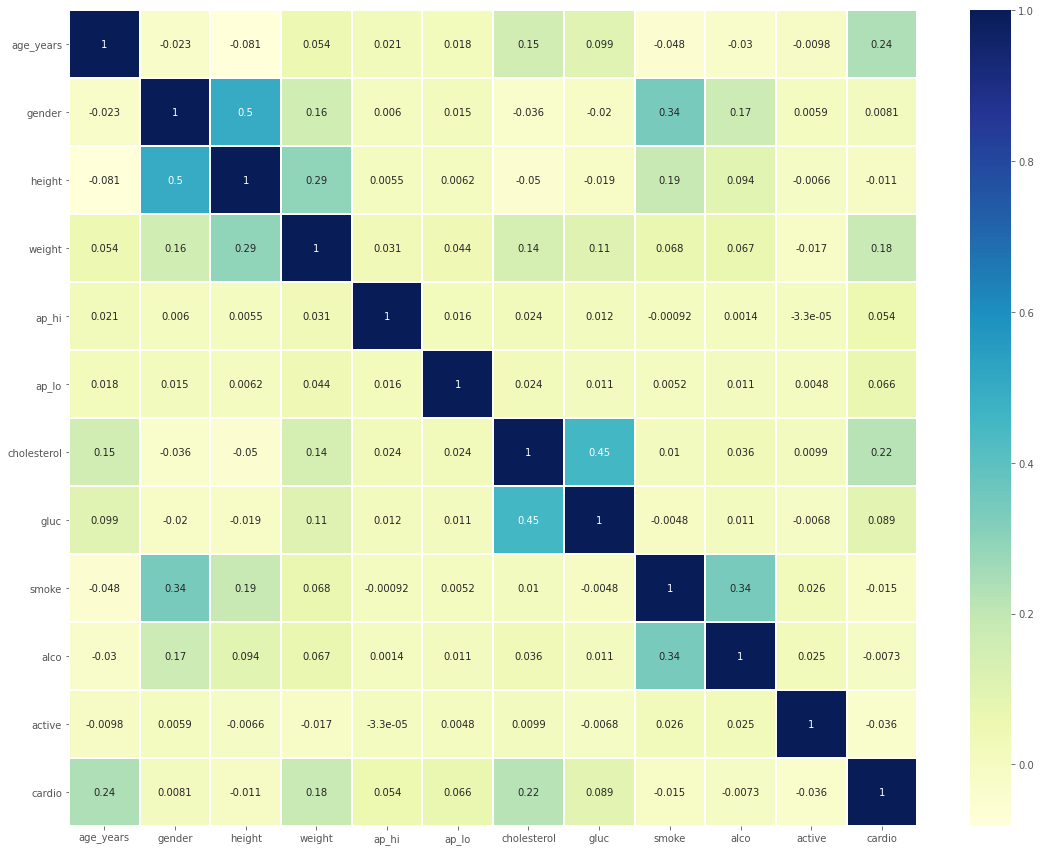

In [12]:
##heatmap with Pearson's correlation 
plt.figure(figsize=(19,15))
sns.heatmap(cardio.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

### b) Data cleaning
- Missig Values
- Duplicate values
- Outlier

In [13]:
## missing values
cardio.isnull().sum().to_frame()

,0
age_years,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0
alco,0


In [14]:
## duplicate values
cardio.duplicated().value_counts()

False    66180
True      3820
dtype: int64

In [15]:
# Remove duplicates
cardio.drop_duplicates(inplace=True)

In [16]:
## outlier
Q1= cardio['ap_lo'].quantile(0.25)
Q3= cardio['ap_lo'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)

80.0
90.0
10.0


In [17]:
## outlier
Lower_Whisker = Q1- 1.5*IQR
Upper_Whisker = Q3+ 1.5*IQR
print(Lower_Whisker, Upper_Whisker)

65.0 105.0


In [18]:
## outlier
outlier =[]
for i in cardio['ap_lo']:
    if ((i> Upper_Whisker) or (i<Lower_Whisker)):
         outlier.append(i)
print(' outlier in the dataset is', len(outlier))

 outlier in the dataset is 4611


In [19]:
## Removing outlier
cardio = cardio[cardio['ap_lo']< Upper_Whisker]

In [20]:
## outlier
Q1= cardio['ap_hi'].quantile(0.25)
Q3= cardio['ap_hi'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)

120.0
140.0
20.0


In [21]:
## outlier
Lower_Whisker = Q1- 1.5*IQR
Upper_Whisker = Q3+ 1.5*IQR
print(Lower_Whisker, Upper_Whisker)

90.0 170.0


In [22]:
## outlier
outlier =[]
for i in Cardio['ap_hi']:
    if ((i> Upper_Whisker) or (i<Lower_Whisker)):
         outlier.append(i)
print(' outlier in the dataset is', len(outlier))

 outlier in the dataset is 1435


In [23]:
## Removing outlier
cardio = cardio[cardio['ap_hi']< Upper_Whisker]

In [24]:
## Removing outlier
cardio = cardio[cardio['ap_lo']< Upper_Whisker]

## Data preprocessing

- Examining the target variable
- Split data into X (features) and y (output) variables
- Feature selection
- split the data into train and test set

In [25]:
### Examining the target variable 
target = 'cardio'
cardio[target].value_counts()

0    31735
1    31470
Name: cardio, dtype: int64

In [26]:
### I no need to balance out my target variable
cardio[target].value_counts(normalize=True)

0    0.502096
1    0.497904
Name: cardio, dtype: float64

In [27]:
#### split the data into predicts and target variable 
X = cardio.drop(target, axis=1)
y = cardio[target]

#### FEATURE SELECTION

In this case, feature selection is performed using ANOVA F measure (F-value) via the f_classif() function.

In [28]:
##
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
##
feature_s = SelectKBest(score_func=f_classif, k=11)
# apply feature selection
X_selected = feature_s.fit(X, y)
##
X_selected_score = pd.DataFrame(X_selected.scores_)
##
X_selected_co = pd.DataFrame(X.columns)
##
Feature_scores = pd.concat([X_selected_co,X_selected_score],axis=1)
##
Feature_scores.columns = ['Features', 'Scores']

In [29]:
## F-score vlaues by variables
Feature_scores

,Features,Scores
0,age_years,3723.616056
1,gender,0.368691
2,height,5.734806
3,weight,1807.344946
4,ap_hi,11734.235031
5,ap_lo,7461.963757
6,cholesterol,2988.717713
7,gluc,396.784252
8,smoke,48.680468
9,alco,22.721940


In [30]:
## Remove variables with low F-score values 
X_select = X.drop(['gender','height','gluc','smoke','alco','active'], axis=1)

In [31]:
#Scaling variables with MixMaxScaler
#from sklearn.preprocessing import MinMaxScaler
#mm = MinMaxScaler()
#X_select_mm = mm.fit_transform(X_select)

In [41]:
## split the data into train and test set
## 80% training and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.2, random_state=42)

In [34]:
#feature_cols = [x for x in df.columns if x != target]

# Random Forest model

- Simple RamdonFroest model (n_estimators=500)
- Hyper-parameters tuning using Bayes optimizer 
- Model prediction 
- Model performance(Classification report, confution matrix)
- Save model
- Interpretation

In [42]:
## simple Random Forest model 
RF = RandomForestClassifier(random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

In [43]:
## setting hyperparameter
RF = RF.set_params(n_estimators=500)
##
RF = RF.fit(X_train, y_train)

In [44]:

y_predict_RF= RF.predict(X_test)

In [45]:
##### Classification report 
### Metrics : accuracy, precision, recall, f1 and AUC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr_ = classification_report(y_test, y_predict_RF)
print(cr_)

score_ = pd.DataFrame({'accuracy': accuracy_score(y_test, y_predict_RF),
                         'precision': precision_score(y_test, y_predict_RF),
                         'recall': recall_score(y_test, y_predict_RF),
                         'f1': f1_score(y_test, y_predict_RF),
                         'auc': roc_auc_score(y_test, y_predict_RF)},
                         index=pd.Index([0]))

print(score_)

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      6368
           1       0.70      0.64      0.66      6273

    accuracy                           0.68     12641
   macro avg       0.68      0.68      0.68     12641
weighted avg       0.68      0.68      0.68     12641

   accuracy  precision    recall        f1       auc
0  0.681038   0.695107  0.636378  0.664447  0.680705


### Hyper-parameters tuning.

In [48]:
###choose hyperparameters
## Bayes Optimizer
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score

space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [50, 300, 750, 1200])
    }

def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], 
                                   max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 100,
            trials= trials)
best

100%|██████████| 100/100 [47:41<00:00, 28.62s/trial, best loss: -0.7237757212173328] 


{'criterion': 1,
 'max_depth': 1180.0,
 'max_features': 0,
 'min_samples_leaf': 0.005797957509105902,
 'min_samples_split': 0.0025096277136597775,
 'n_estimators': 0}

In [49]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 50, 1: 300, 2: 750, 3: 1200}

modelforest = RandomForestClassifier(criterion = crit[best['criterion']], 
                                       max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]
                                      ).fit(X_train,y_train)

### Making Prediction on the data test 

In [50]:
# Prediction
y_predictRF = modelforest.predict (X_test)

In [59]:
# probability
y_probRF = modelforest.predict_proba(X_test)
y_probRF = pd.DataFrame(y_probRF)
y_probRF.head(10)

,0,1
0,0.586125,0.413875
1,0.319638,0.680362
2,0.547875,0.452125
3,0.272542,0.727458
4,0.126616,0.873384
5,0.778142,0.221858
6,0.649054,0.350946
7,0.476648,0.523352
8,0.844307,0.155693
9,0.581291,0.418709


### Model performace evaluation.

In [51]:
##### Classification report 
### Metrics : accuracy, precision, recall, f1 and AUC
cr = classification_report(y_test, y_predictRF)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_predictRF),
                         'precision': precision_score(y_test, y_predictRF),
                         'recall': recall_score(y_test, y_predictRF),
                         'f1': f1_score(y_test, y_predictRF),
                         'auc': roc_auc_score(y_test, y_predictRF)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.70      0.77      0.74      6368
           1       0.74      0.67      0.70      6273

    accuracy                           0.72     12641
   macro avg       0.72      0.72      0.72     12641
weighted avg       0.72      0.72      0.72     12641

   accuracy  precision    recall       f1      auc
0  0.720038   0.743498  0.665391  0.70228  0.71963


## Observations.
- Overall, the random forest had an acceptable performance predicting the target variable(accuracy 72%).

### Save the model

In [ ]:
import pickle
import joblib
joblib.dump(modelforest,'.../../Modelrandomforest_model.pkl')

### Interpretation model with Partial dependence plot (PD plot)

"The partial dependence plot (PD plot) shows the marginal effect one or two features have on the predicted outcome of a machine learning model (J. H. Friedman 2001). 
A partial dependence plot can show whether the relationship between the target and a feature is linear, monotonous or more complex." (from PDPbox documentation).

In [53]:
### Partial dependence plot (PD plot)
from pdpbox import pdp, get_dataset, info_plots
def plot_pdp(model, df, feature, cluster_flag=False, nb_clusters=None, lines_flag=False):
    
    # Create the data that we will plot
    pdp_goals = pdp.pdp_isolate(model=model, dataset=df, model_features=df.columns.tolist(), feature=feature)

    # plot it
    pdp.pdp_plot(pdp_goals, feature, cluster=cluster_flag, n_cluster_centers=nb_clusters, plot_lines=lines_flag)
    plt.show()

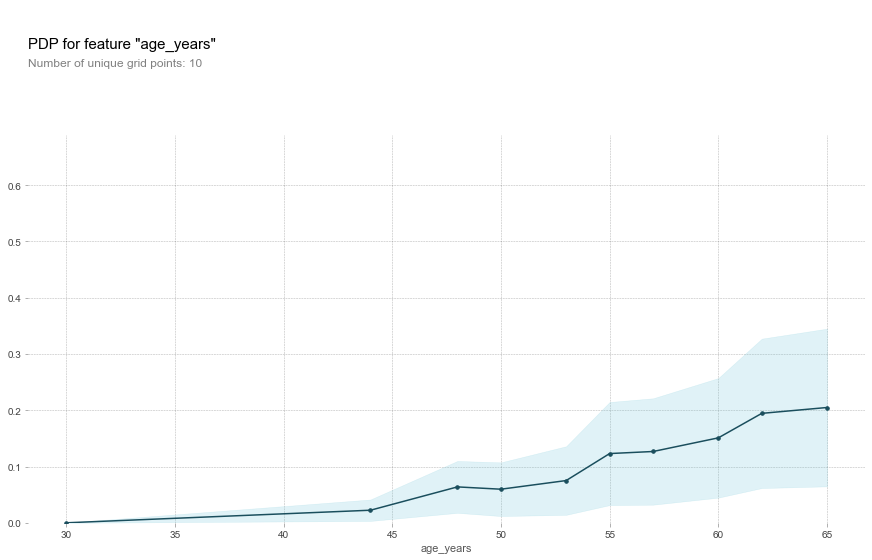

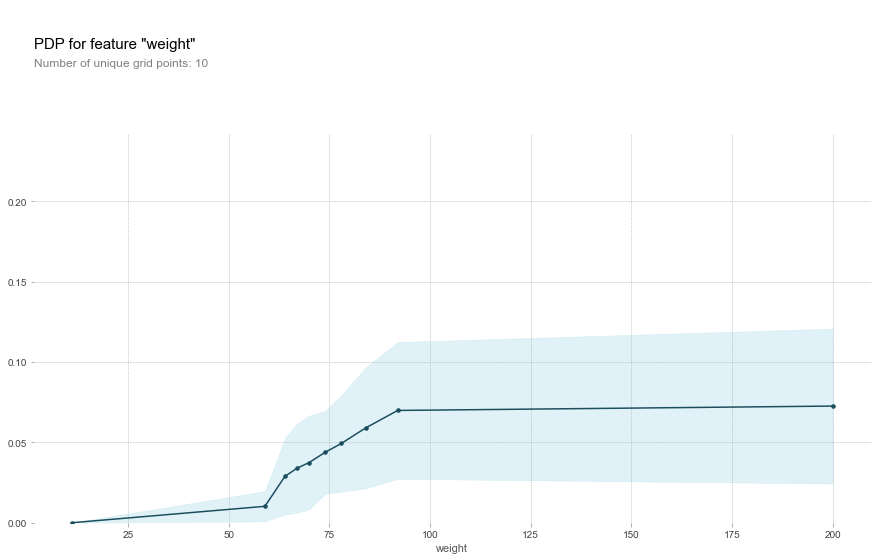

In [59]:
# PD univariate plot for feature 'ap_hi'
plot_pdp(modelforest, X_train, 'age_years')
# PD univariate plot for feature 'ap_lo'
plot_pdp(modelforest, X_train, 'weight')

### Observations.

- Top: according to the model prediction, the age of people that suffer some cardiovascular disease ranges from 55 to 65.

- Button: according to the model prediction, people with a weight greater than 75 kg, have a greater likelihood of suffering cardiovascular disease.

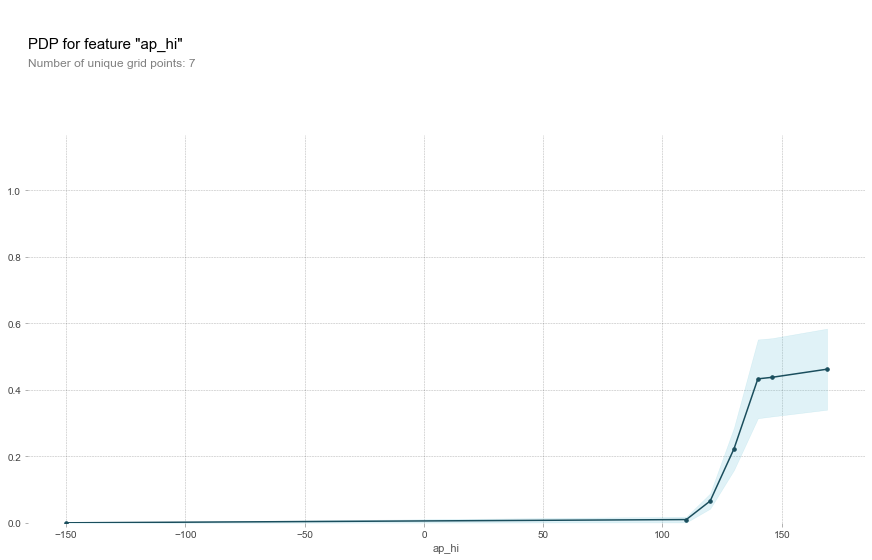

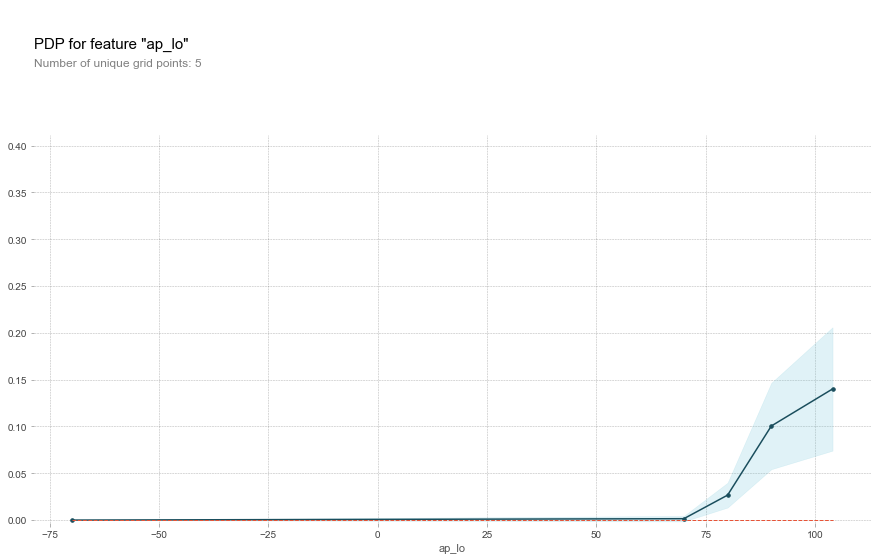

In [55]:
# PD univariate plot for feature 'ap_hi'
plot_pdp(modelforest, X_train, 'ap_hi')
# PD univariate plot for feature 'age_years'
plot_pdp(modelforest, X_train, 'ap_lo')

### Observations.

- Top: this PD plot shows us that the Systolic blood pressure (ap_hi) of people that suffer some cardiovacular disease ranges from 120 mmHg to 169 mmHg.


- Button: this PD plot shows us that the Diastolic blood pressure (ap_lo) of people that suffer some cardiovacular disease ranges from 75 mmHg to 100.5 mmHg.

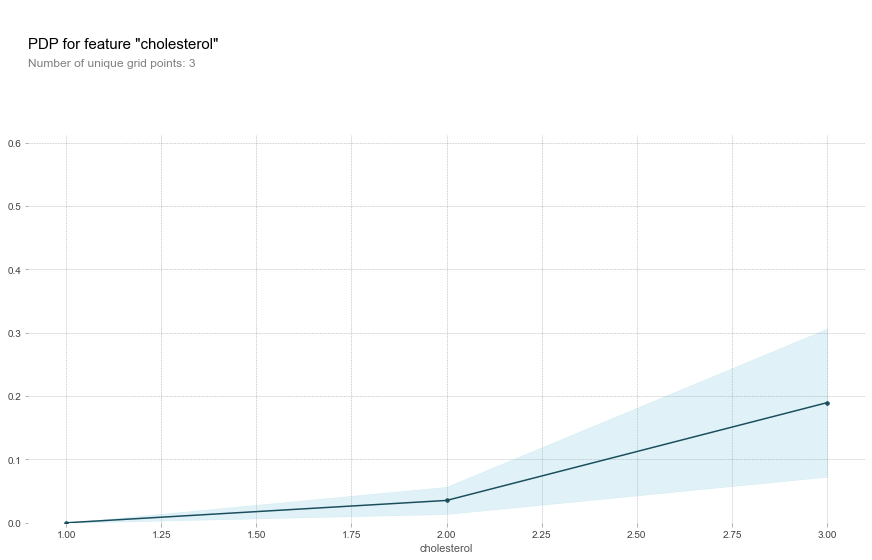

In [57]:
# PD univariate plot for feature 'ap_hi'
plot_pdp(modelforest, X_train, 'cholesterol')

### Observations.

- According to the model prediction, people with a cholesterol level above normal (2.00) and well above normal(3.00) have a greater likelihood of suffering some cardiovascular disease.